In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [62]:
pathfile = 'C:/Users/GFreitas/Downloads/cars.csv'
df = pd.read_csv(pathfile)
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [63]:
df.drop(['feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','duration_listed','engine_has_gas','engine_type','has_warranty','is_exchangeable','location_region','number_of_photos','body_type','up_counter','feature_0'],axis=1,inplace=True)
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,state,drivetrain,price_usd
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,2.5,owned,all,10900.00
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,3.0,owned,all,5000.00
2,Subaru,Forester,automatic,red,402000,2001,gasoline,2.5,owned,all,2800.00
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,3.0,owned,all,9999.00
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,2.5,owned,all,2134.11
...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,3.5,owned,front,2750.00
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,2.2,owned,front,4800.00
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,3.5,owned,front,4300.00
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,2.0,owned,front,4000.00


In [64]:
Filtro1 = ['Jetta']
vwjetta_df = df[df['model_name'].isin(Filtro1)] 
vwjetta_df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,state,drivetrain,price_usd
15136,Volkswagen,Jetta,mechanical,grey,146000,2008,diesel,1.9,owned,front,6800.00
15138,Volkswagen,Jetta,mechanical,other,611100,1986,gasoline,1.8,owned,front,550.00
15150,Volkswagen,Jetta,mechanical,silver,150730,2012,gasoline,1.4,owned,front,8848.99
15155,Volkswagen,Jetta,mechanical,black,345000,1989,gasoline,1.6,owned,front,500.00
15187,Volkswagen,Jetta,mechanical,brown,300000,1986,diesel,1.6,owned,front,500.00
...,...,...,...,...,...,...,...,...,...,...,...
19243,Volkswagen,Jetta,automatic,grey,300000,1991,gasoline,1.8,owned,front,650.00
19266,Volkswagen,Jetta,mechanical,silver,130000,2014,gasoline,1.6,owned,front,9600.00
19305,Volkswagen,Jetta,mechanical,white,560000,1986,gasoline,1.3,owned,front,300.00
19306,Volkswagen,Jetta,mechanical,blue,260000,1987,gasoline,1.3,owned,front,550.00


In [65]:
vwjetta_df.reset_index(drop=True, inplace=True)
vwjetta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  237 non-null    object 
 1   model_name         237 non-null    object 
 2   transmission       237 non-null    object 
 3   color              237 non-null    object 
 4   odometer_value     237 non-null    int64  
 5   year_produced      237 non-null    int64  
 6   engine_fuel        237 non-null    object 
 7   engine_capacity    237 non-null    float64
 8   state              237 non-null    object 
 9   drivetrain         237 non-null    object 
 10  price_usd          237 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 20.5+ KB


In [66]:
vwjetta_df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_capacity      float64
state                 object
drivetrain            object
price_usd            float64
dtype: object

In [67]:
vwjetta_df.describe()

,odometer_value,year_produced,engine_capacity,price_usd
count,237.000000,237.000000,237.000000,237.000000
mean,221075.518987,1999.666667,1.694515,4935.145823
std,139691.617239,11.964755,0.254143,4609.742497
min,20.000000,1978.000000,1.300000,94.850000
25%,110000.000000,1987.000000,1.600000,700.000000
50%,215000.000000,2000.000000,1.600000,3500.000000
75%,300000.000000,2011.000000,1.800000,8500.000000
max,1000000.000000,2018.000000,2.500000,17150.000000


In [68]:
print(vwjetta_df['drivetrain'].value_counts())
print(vwjetta_df['state'].value_counts())
print(vwjetta_df['transmission'].value_counts())
print(vwjetta_df['color'].value_counts())
print(vwjetta_df['engine_fuel'].value_counts())

front    237
Name: drivetrain, dtype: int64
owned        230
emergency      7
Name: state, dtype: int64
mechanical    165
automatic      72
Name: transmission, dtype: int64
black     42
grey      36
red       34
silver    31
blue      28
white     23
other     21
brown     14
green      6
violet     1
orange     1
Name: color, dtype: int64
gasoline         188
diesel            41
gas                5
hybrid-petrol      3
Name: engine_fuel, dtype: int64


In [69]:
vwjetta_df.drop(['manufacturer_name','model_name','drivetrain'],axis=1,inplace=True)
vwjetta_df['engine_fuel'].replace('gasoline','gas',inplace=True)
vwjetta_df

C:\Users\GFreitas\AppData\Local\Temp\ipykernel_11296\1295689779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vwjetta_df.drop(['manufacturer_name','model_name','drivetrain'],axis=1,inplace=True)
C:\Users\GFreitas\AppData\Local\Temp\ipykernel_11296\1295689779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vwjetta_df['engine_fuel'].replace('gasoline','gas',inplace=True)


,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,state,price_usd
0,mechanical,grey,146000,2008,diesel,1.9,owned,6800.00
1,mechanical,other,611100,1986,gas,1.8,owned,550.00
2,mechanical,silver,150730,2012,gas,1.4,owned,8848.99
3,mechanical,black,345000,1989,gas,1.6,owned,500.00
4,mechanical,brown,300000,1986,diesel,1.6,owned,500.00
...,...,...,...,...,...,...,...,...
232,automatic,grey,300000,1991,gas,1.8,owned,650.00
233,mechanical,silver,130000,2014,gas,1.6,owned,9600.00
234,mechanical,white,560000,1986,gas,1.3,owned,300.00
235,mechanical,blue,260000,1987,gas,1.3,owned,550.00


In [70]:
print(vwjetta_df['engine_fuel'].value_counts())

gas              193
diesel            41
hybrid-petrol      3
Name: engine_fuel, dtype: int64


<AxesSubplot:xlabel='color', ylabel='price_usd'>

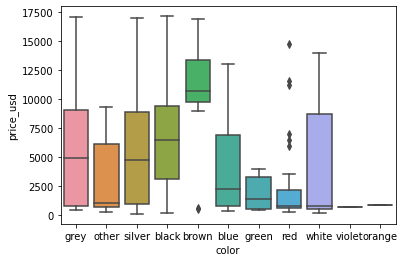

In [71]:
sns.boxplot(x='color',y='price_usd',data=vwjetta_df) #Percebe-se que as cores se sobrepoem em boa parte dos preços, não sendo portanto uma boa variavel preditiva.

<AxesSubplot:xlabel='transmission', ylabel='price_usd'>

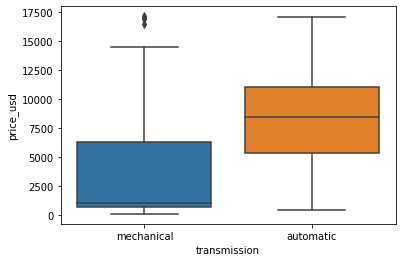

In [72]:
sns.boxplot(x='transmission',y='price_usd',data=vwjetta_df) #A transmissão não se sobrepoem muito, sendo uma variavel preditiva em potencial.

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

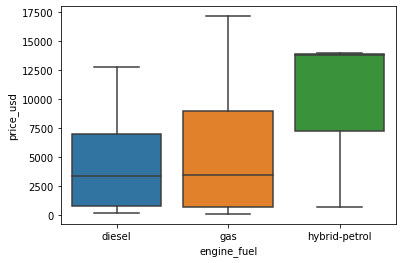

In [73]:
sns.boxplot(x='engine_fuel',y='price_usd',data=vwjetta_df) #O combustivel hibrido tem clara influencia no preço do carro, mas possui pequeno numero de carros com esta caracteristica.

<AxesSubplot:xlabel='state', ylabel='price_usd'>

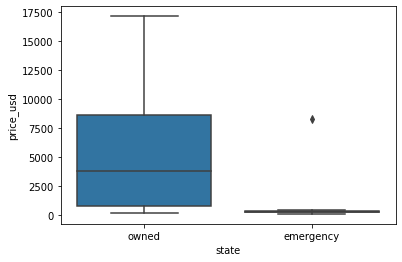

In [74]:
sns.boxplot(x='state',y='price_usd',data=vwjetta_df) #O estado do carro tem influencia clara no preço dos veículos, mas a quantidade de carros em estado 'emergency' é bem pequeno.

In [75]:
vwjetta_df.drop('color',axis=1,inplace=True)
vwjetta_df

C:\Users\GFreitas\AppData\Local\Temp\ipykernel_11296\3283559350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vwjetta_df.drop('color',axis=1,inplace=True)


,transmission,odometer_value,year_produced,engine_fuel,engine_capacity,state,price_usd
0,mechanical,146000,2008,diesel,1.9,owned,6800.00
1,mechanical,611100,1986,gas,1.8,owned,550.00
2,mechanical,150730,2012,gas,1.4,owned,8848.99
3,mechanical,345000,1989,gas,1.6,owned,500.00
4,mechanical,300000,1986,diesel,1.6,owned,500.00
...,...,...,...,...,...,...,...
232,automatic,300000,1991,gas,1.8,owned,650.00
233,mechanical,130000,2014,gas,1.6,owned,9600.00
234,mechanical,560000,1986,gas,1.3,owned,300.00
235,mechanical,260000,1987,gas,1.3,owned,550.00


In [76]:
dv = pd.get_dummies(vwjetta_df["engine_fuel"])
dv.head()

,diesel,gas,hybrid-petrol
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


In [77]:
vwjetta_df = pd.concat([vwjetta_df, dv], axis=1)
vwjetta_df.drop('engine_fuel',axis=1,inplace=True)
vwjetta_df

,transmission,odometer_value,year_produced,engine_capacity,state,price_usd,diesel,gas,hybrid-petrol
0,mechanical,146000,2008,1.9,owned,6800.00,1,0,0
1,mechanical,611100,1986,1.8,owned,550.00,0,1,0
2,mechanical,150730,2012,1.4,owned,8848.99,0,1,0
3,mechanical,345000,1989,1.6,owned,500.00,0,1,0
4,mechanical,300000,1986,1.6,owned,500.00,1,0,0
...,...,...,...,...,...,...,...,...,...
232,automatic,300000,1991,1.8,owned,650.00,0,1,0
233,mechanical,130000,2014,1.6,owned,9600.00,0,1,0
234,mechanical,560000,1986,1.3,owned,300.00,0,1,0
235,mechanical,260000,1987,1.3,owned,550.00,0,1,0


In [78]:
dv1 = pd.get_dummies(vwjetta_df["transmission"])
dv1.drop('mechanical',axis=1,inplace=True)
vwjetta_df = pd.concat([vwjetta_df, dv1], axis=1)
vwjetta_df.rename(columns={'automatic':'trans_auto'},inplace=True)
vwjetta_df.drop('transmission',axis=1,inplace=True)
vwjetta_df

,odometer_value,year_produced,engine_capacity,state,price_usd,diesel,gas,hybrid-petrol,trans_auto
0,146000,2008,1.9,owned,6800.00,1,0,0,0
1,611100,1986,1.8,owned,550.00,0,1,0,0
2,150730,2012,1.4,owned,8848.99,0,1,0,0
3,345000,1989,1.6,owned,500.00,0,1,0,0
4,300000,1986,1.6,owned,500.00,1,0,0,0
...,...,...,...,...,...,...,...,...,...
232,300000,1991,1.8,owned,650.00,0,1,0,1
233,130000,2014,1.6,owned,9600.00,0,1,0,0
234,560000,1986,1.3,owned,300.00,0,1,0,0
235,260000,1987,1.3,owned,550.00,0,1,0,0


In [79]:
dv2 = pd.get_dummies(vwjetta_df["state"])
dv2.drop('owned',axis=1,inplace=True)
vwjetta_df = pd.concat([vwjetta_df, dv2], axis=1)
vwjetta_df.rename(columns={'emergency':'state_emergency'},inplace=True)
vwjetta_df.drop('state',axis=1,inplace=True)
vwjetta_df

,odometer_value,year_produced,engine_capacity,price_usd,diesel,gas,hybrid-petrol,trans_auto,state_emergency
0,146000,2008,1.9,6800.00,1,0,0,0,0
1,611100,1986,1.8,550.00,0,1,0,0,0
2,150730,2012,1.4,8848.99,0,1,0,0,0
3,345000,1989,1.6,500.00,0,1,0,0,0
4,300000,1986,1.6,500.00,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
232,300000,1991,1.8,650.00,0,1,0,1,0
233,130000,2014,1.6,9600.00,0,1,0,0,0
234,560000,1986,1.3,300.00,0,1,0,0,0
235,260000,1987,1.3,550.00,0,1,0,0,0


In [80]:
vwjetta_df.corr()

,odometer_value,year_produced,engine_capacity,price_usd,diesel,gas,hybrid-petrol,trans_auto,state_emergency
odometer_value,1.000000,-0.532571,0.158329,-0.579777,0.247802,-0.225592,-0.053788,-0.324705,-0.055061
year_produced,-0.532571,1.000000,0.022668,0.931963,-0.096546,0.075740,0.063223,0.509471,-0.107848
engine_capacity,0.158329,0.022668,1.000000,-0.113834,0.146251,-0.113022,-0.101728,0.104730,-0.065017
price_usd,-0.579777,0.931963,-0.113834,1.000000,-0.099243,0.064283,0.112198,0.460052,-0.133286
diesel,0.247802,-0.096546,0.146251,-0.099243,1.000000,-0.957891,-0.051787,-0.180846,0.051989
gas,-0.225592,0.075740,-0.113022,0.064283,-0.957891,1.000000,-0.237140,0.150237,-0.044894
hybrid-petrol,-0.053788,0.063223,-0.101728,0.112198,-0.051787,-0.237140,1.000000,0.089339,-0.019753
trans_auto,-0.324705,0.509471,0.104730,0.460052,-0.180846,0.150237,0.089339,1.000000,-0.061051
state_emergency,-0.055061,-0.107848,-0.065017,-0.133286,0.051989,-0.044894,-0.019753,-0.061051,1.000000


In [81]:
#Vamos Analisar a significância estatística das variáveis em comparação com o preço (price_usd).
#Neste projeto, vamos utilizar p < 0.05 como estatisticamente significante, ou seja, temos confiança de >95% de que a correlação entre os dados é significante, e não uma coincidência)

In [82]:
coef_pearson, valor_p = stats.pearsonr(vwjetta_df['year_produced'], vwjetta_df['price_usd'])
coef_pearson, valor_p #Correlação muito significante.

(0.9319630298896932, 1.5800188846145558e-105)

In [83]:
coef_pearson, valor_p = stats.pearsonr(vwjetta_df['odometer_value'], vwjetta_df['price_usd'])
coef_pearson, valor_p #Correlação muito significante.

(-0.5797769096350094, 1.1041489977250406e-22)

In [84]:
coef_pearson, valor_p = stats.pearsonr(vwjetta_df['engine_capacity'], vwjetta_df['price_usd'])
coef_pearson, valor_p #Correlação pouco significante.

(-0.11383443342383634, 0.08031131698894292)

In [85]:
coef_pearson, valor_p = stats.pearsonr(vwjetta_df['gas'], vwjetta_df['price_usd'])
coef_pearson, valor_p #Correlação pouco significante.

(0.06428250002746341, 0.32442573098166405)

In [86]:
coef_pearson, valor_p = stats.pearsonr(vwjetta_df['diesel'], vwjetta_df['price_usd'])
coef_pearson, valor_p #Correlação pouco significante.

(-0.09924274199068453, 0.1276315868782203)

In [87]:
coef_pearson, valor_p = stats.pearsonr(vwjetta_df['hybrid-petrol'], vwjetta_df['price_usd'])
coef_pearson, valor_p #Correlação pouco significante.

(0.11219832950976442, 0.08478272396582609)

In [88]:
coef_pearson, valor_p = stats.pearsonr(vwjetta_df['trans_auto'], vwjetta_df['price_usd'])
coef_pearson, valor_p #Correlação muito significante.

(0.4600520470645056, 8.15054318774417e-14)

In [89]:
coef_pearson, valor_p = stats.pearsonr(vwjetta_df['state_emergency'], vwjetta_df['price_usd'])
coef_pearson, valor_p #Correlação significante.

(-0.13328594112976014, 0.04034308543376035)

In [90]:
vwjetta_df.drop(['gas','diesel','hybrid-petrol'],axis=1,inplace=True)
vwjetta_df

,odometer_value,year_produced,engine_capacity,price_usd,trans_auto,state_emergency
0,146000,2008,1.9,6800.00,0,0
1,611100,1986,1.8,550.00,0,0
2,150730,2012,1.4,8848.99,0,0
3,345000,1989,1.6,500.00,0,0
4,300000,1986,1.6,500.00,0,0
...,...,...,...,...,...,...
232,300000,1991,1.8,650.00,1,0
233,130000,2014,1.6,9600.00,0,0
234,560000,1986,1.3,300.00,0,0
235,260000,1987,1.3,550.00,0,0


In [91]:
#Teste de ANOVA (Analise de Variância)
#O teste de ANOVA testa a significância da variação das médias entre grupos de uma mesma variável.
#Dois parâmetros são observados no teste ANOVA: Teste_F e Valor_P.
#Teste_F: ANOVA assume que a hipótese que a média entre os grupos é a mesma, e quantifica o desvio da média calculada pela média assumida. Quanto maior o Teste_F, maior a diferença entre médias.
#Valor_P: Indica o quão estatisticamente significante é o valor de Teste_F.

In [92]:
grp_year_produced=vwjetta_df[['year_produced', 'price_usd']].groupby(['year_produced'])
grp_year_produced.head()

,year_produced,price_usd
0,2008,6800.00
1,1986,550.00
2,2012,8848.99
3,1989,500.00
4,1986,500.00
...,...,...
205,1982,950.00
209,1978,350.00
211,1989,800.00
216,2017,16950.00


In [93]:
f_val, p_val = stats.f_oneway(vwjetta_df['year_produced'],vwjetta_df['price_usd'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 96.10590881029496 , P = 8.936854034287284e-21


In [94]:
f_val, p_val = stats.f_oneway(vwjetta_df['odometer_value'],vwjetta_df['price_usd'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 566.7698984595692 , P = 7.035245096650256e-83


In [95]:
f_val, p_val = stats.f_oneway(vwjetta_df['engine_capacity'],vwjetta_df['price_usd'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 271.4542870443778 , P = 1.64529167659362e-48


In [96]:
f_val, p_val = stats.f_oneway(vwjetta_df['trans_auto'],vwjetta_df['price_usd'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 271.60735016353726 , P = 1.566992019416432e-48


In [97]:
f_val, p_val = stats.f_oneway(vwjetta_df['state_emergency'],vwjetta_df['price_usd'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 271.6375433605779 , P = 1.551994252060017e-48


Ponto de Interceptação: -713072.6179725266
Inclinação: [359.06372585]
Equação do Modelo: Preço =  -713072.6179725266 + ( [359.06372585] * Ano Produzido)


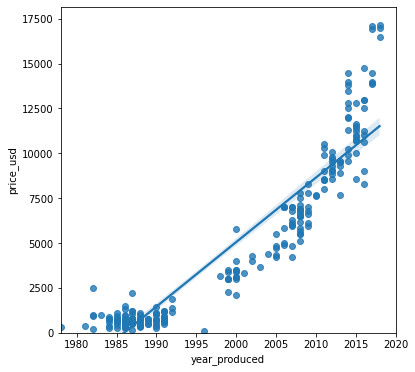

In [98]:
#Regressão Linear Simples
lm = LinearRegression()
X = vwjetta_df[['year_produced']]
Y = vwjetta_df['price_usd']
lm.fit(X,Y)
width = 6
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x=X,y=Y,data=vwjetta_df)
plt.ylim(0,)
plt.xlim(vwjetta_df['year_produced'].min(),)
print("Ponto de Interceptação:",lm.intercept_)
print("Inclinação:",lm.coef_)
print('Equação do Modelo: Preço = ',lm.intercept_,'+ (',lm.coef_,'*','Ano Produzido)')

C:\Users\GFreitas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


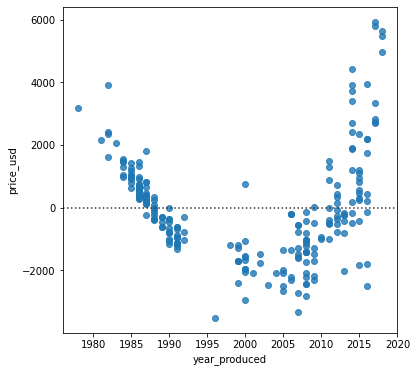

In [99]:
width = 6
height = 6
plt.figure(figsize=(width, height))
sns.residplot(vwjetta_df['year_produced'], vwjetta_df['price_usd'])
plt.show()

In [100]:
#Regressão Linear Múltipla
lm1 = LinearRegression()
Z = vwjetta_df[['odometer_value', 'engine_capacity', 'year_produced', 'trans_auto','state_emergency']]
lm1.fit(Z,Y)
width = 6
height = 6
print("Ponto de Interceptação:",lm1.intercept_)
print("Coeficientes:",lm1.coef_)
print('Equação do Modelo: Preço = ',lm1.intercept_,'+ (',lm1.coef_[0],'*','Odômetro)+(',lm1.coef_[1],'*','Motor em L)+(',lm1.coef_[2],'*','Ano Produzido)+(',lm1.coef_[3],'*','Automático? 1-Sim, 0-Não)+(',lm1.coef_[4],'*','Acidentes? 1-Sim, 0-Não)')
print('VW Jetta com 120000 km rodados, ano de 2010, motor 2.5L, automático, sem acidentes, tem o preço predito :',(lm1.coef_[0]*120000)+(lm1.coef_[1]*2.5)+(lm1.coef_[2]*2010)+(lm1.coef_[3]*1)+(lm1.coef_[4]*0)+lm1.intercept_)

Ponto de Interceptação: -671413.2197899015
Coeficientes: [-3.19555163e-03 -2.18813107e+03  3.40477361e+02 -1.21588160e+02
 -1.41002247e+03]
Equação do Modelo: Preço =  -671413.2197899015 + ( -0.0031955516278117132 * Odômetro)+( -2188.1310718692484 * Motor em L)+( 340.4773605623501 * Ano Produzido)+( -121.58815955002002 * Automático? 1-Sim, 0-Não)+( -1410.022474231756 * Acidentes? 1-Sim, 0-Não)
VW Jetta com 120000 km rodados, ano de 2010, motor 2.5L, automático, sem acidentes, tem o preço predito : 6970.892905861605


C:\Users\GFreitas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\GFreitas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


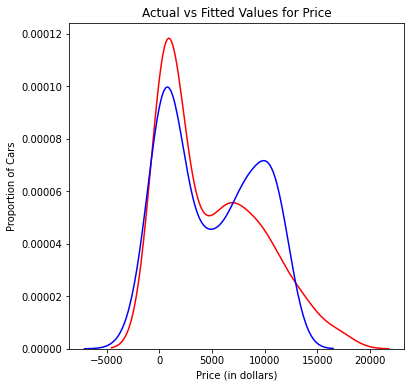

In [101]:
Y_hat = lm1.predict(Z)
plt.figure(figsize=(width, height))
ax1 = sns.distplot(vwjetta_df['price_usd'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

        3        2
0.2292 x - 1361 x + 2.692e+06 x - 1.775e+09


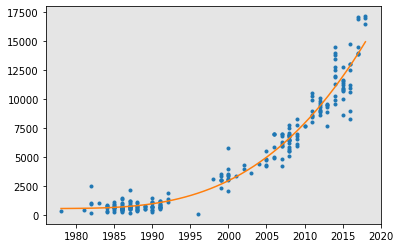

In [102]:
#Regressao Polinomial

x = vwjetta_df['year_produced']

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(x.min(),x.max())
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.show()
    plt.close()

f = np.polyfit(x, Y, 3)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, Y, 'year_produced')

In [103]:
J = 2010 #input do ano a ser predito
print((p[0])+(p[1]*(J))+(p[2]*(J**2))+(p[3]*(J**3)))

7918.641908407211


In [104]:
#Avaliar melhor modelo:
#RLS RSquared e MSE
print('RSquared é:',lm.score(X,Y))
Yhat=lm.predict(X)
mse1 = mean_squared_error(vwjetta_df['price_usd'], Yhat)
print('MSE é:', mse1)

RSquared é: 0.8685550890811768
MSE é: 2781382.8061697735


In [105]:
#RLM RSquared e MSE
print('RSquared é:',lm1.score(Z,Y))
Y_predict_multifit = lm1.predict(Z)
mse2 = mean_squared_error(vwjetta_df['price_usd'], Y_predict_multifit)
print('MSE é:', mse2)

RSquared é: 0.8947963329213086
MSE é: 2226116.3913709093


In [107]:
#PR RSquared e MSE
r_squared = r2_score(Y, p(x))
print('RSquared é:', r_squared)
mse3 = mean_squared_error(vwjetta_df['price_usd'], p(x))
print('MSE é:', mse3)

RSquared é: 0.9537088064282794
MSE é: 979524.6463134292


In [108]:
#Predições
Ano = 2010
Odometro = 120000
MotorL = 2.5
Automatico = 1
Acidente = 0
Auto = 'Automático' if Automatico==1 else 'Manual'
Ac = 'Acidentado' if Acidente==1 else 'Não Acidentado'
print('O preço predito por RLS com ano',Ano,'é:',(lm.coef_*Ano)+lm.intercept_)
print('O preço predito por RLM com',Odometro,'km rodados, ano',Ano,', motor',MotorL,'L,',Auto,',',Ac,'é:',(lm1.coef_[0]*Odometro)+(lm1.coef_[1]*MotorL)+(lm1.coef_[2]*Ano)+(lm1.coef_[3]*Automatico)+(lm1.coef_[4]*Acidente)+lm1.intercept_)
print('O preço predito por RP de 3 graus com ano',Ano,'é:',(p[0])+(p[1]*(Ano))+(p[2]*(Ano**2))+(p[3]*(Ano**3)))

O preço predito por RLS com ano 2010 é: [8645.47098992]
O preço predito por RLM com 120000 km rodados, ano 2010 , motor 2.5 L, Automático , Não Acidentado é: 6970.892905861605
O preço predito por RP de 3 graus com ano 2010 é: 7918.641908407211
